In [12]:
from peak_warming_calculator_test  import *
import matplotlib.pyplot as plt

In [13]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
from numpy import genfromtxt
import matplotlib.cm as cm

In [14]:
import time

In [15]:
# from varying_g_peak_warming_calculator import *

## Not Sampling s

Text(0, 0.5, 'Peak Warming (K)')

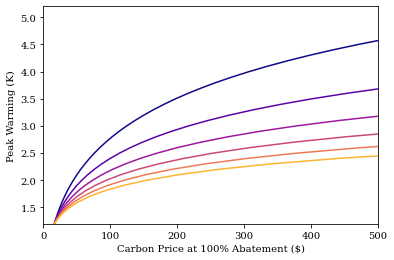

In [46]:
fig = plt.figure()

# plt.legend()
plt.rc('font', family='serif')

## plot curves from Myles' paper

# W0 = 75*10**12  
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.75*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
# T_0 = 1.0136929156818866
T_0 = 1.2

T_m = np.arange(T_0, 5,0.1)
g_bar = np.arange(0.01, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
#     plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]
    plt.plot(A_B*10**(-9), T_m, color=cm.plasma(i/len(g_bar)))

# plt.legend(title="g (% yr$^{-1}$)")
# plt.xlim(0, 530)
plt.xlim(0, 500)
plt.ylim(1.2, 5.2)
plt.xlabel("Carbon Price at 100% Abatement ($)")
plt.ylabel("Peak Warming (K)")

In [47]:
# Define the model inputs
problem_2 = {
'num_vars': 2,
'names': ['P_50/P_100', 'P_100'],
'bounds': [[0.5, 0.8],
[100, 500]]
}
# Generate samples
param_values_2 = saltelli.sample(problem_2, 8)

In [48]:
param_values_2

array([[  0.528125, 287.5     ],
       [  0.640625, 287.5     ],
       [  0.528125, 362.5     ],
       [  0.528125, 362.5     ],
       [  0.640625, 287.5     ],
       [  0.640625, 362.5     ],
       [  0.678125, 487.5     ],
       [  0.790625, 487.5     ],
       [  0.678125, 162.5     ],
       [  0.678125, 162.5     ],
       [  0.790625, 487.5     ],
       [  0.790625, 162.5     ],
       [  0.753125, 187.5     ],
       [  0.565625, 187.5     ],
       [  0.753125, 462.5     ],
       [  0.753125, 462.5     ],
       [  0.565625, 187.5     ],
       [  0.565625, 462.5     ],
       [  0.603125, 387.5     ],
       [  0.715625, 387.5     ],
       [  0.603125, 262.5     ],
       [  0.603125, 262.5     ],
       [  0.715625, 387.5     ],
       [  0.715625, 262.5     ],
       [  0.640625, 137.5     ],
       [  0.753125, 137.5     ],
       [  0.640625, 212.5     ],
       [  0.640625, 212.5     ],
       [  0.753125, 137.5     ],
       [  0.753125, 212.5     ],
       [  

In [49]:
P_100_list = []

for i in range(len(param_values_2)):
    P_100_list.append(param_values_2[i][1])

In [50]:
consumption_growth_array = 0.03
consumption_discount = consumption_growth + 0.015

In [51]:
peak_T_list = []
output_data_list = []

for i in range(len(param_values_2)):
    P_50 = param_values_2[i][0]*param_values_2[i][1]
    P_100 = param_values_2[i][1]
    r = consumption_discount
    s = 0.2
#     s = r * np.log(5)/np.log((P_100)/(P_50))
    peak_T, output_data = peak_warming_calculator(P_50=P_50, P_100=P_100, consumption_growth=consumption_growth, consumption_discount=consumption_discount, s=s, r=r, return_all_output=True)
    peak_T_list.append(peak_T)
    output_data_list.append(output_data)

/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator_test.py:128: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


Text(0, 0.5, 'Peak Warming (K)')

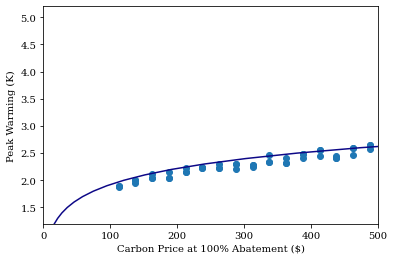

In [52]:
# for i in range(len(param_values_2)):
#     plt.scatter(P_100_list[i], peak_T_list[i])
plt.scatter(P_100_list, peak_T_list)

# plt.legend()
plt.rc('font', family='serif')

## plot curves from Myles' paper
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year
G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))
gamma = 2
E_bar = 0.75*40.040508
T_0 = 1.2

T_m = np.arange(T_0, 5,0.1)
g_bar = np.array([0.03])

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
    plt.plot(A_B*10**(-9), T_m, color=cm.plasma(i/len(g_bar)))

plt.xlim(0, 500)
plt.ylim(1.2, 5.2)
plt.xlabel("Carbon Price at 100% Abatement ($)")
plt.ylabel("Peak Warming (K)")


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator_test.py:128: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


Text(0, 0.5, 'Peak Warming (K)')

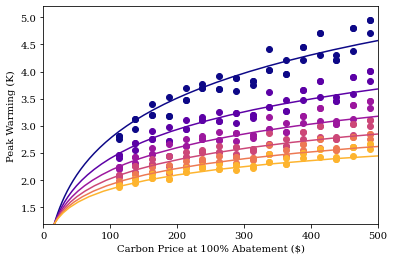

In [53]:
consumption_growth_array = np.linspace(0.01, 0.035, 6)

for j in range(len(consumption_growth_array)):
    peak_T_list = []
    output_data_list = []
    
    consumption_growth = consumption_growth_array[j]
    consumption_discount = consumption_growth + 0.015

    for i in range(len(param_values_2)):
        P_50 = param_values_2[i][0]*param_values_2[i][1]
        P_100 = param_values_2[i][1]
        r = consumption_discount
#         s = 0.2
        s = r * np.log(5)/np.log((P_100)/(P_50))
        peak_T, output_data = peak_warming_calculator(P_50=P_50, P_100=P_100, consumption_growth=consumption_growth, consumption_discount=consumption_discount, s=s, r=r, return_all_output=True)
        peak_T_list.append(peak_T)
        output_data_list.append(output_data)

    plt.scatter(P_100_list, peak_T_list, color=cm.plasma(j/len(consumption_growth_array)))

# plt.legend()
plt.rc('font', family='serif')

## plot curves from Myles' paper
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year
G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))
gamma = 2
E_bar = 0.75*40.040508
T_0 = 1.2

T_m = np.arange(T_0, 5,0.1)
g_bar = consumption_growth_array

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
    plt.plot(A_B*10**(-9), T_m, color=cm.plasma(i/len(g_bar)))

plt.xlim(0, 500)
plt.ylim(1.2, 5.2)
plt.xlabel("Carbon Price at 100% Abatement ($)")
plt.ylabel("Peak Warming (K)")


In [5]:
consumption_growth_array = np.linspace(0.01, 0.035, 6)

In [6]:
consumption_growth_array

array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035])

In [17]:
# Define the model inputs
problem_2 = {
'num_vars': 2,
'names': ['P_50/P_100', 'P_100'],
'bounds': [[0.5, 0.8],
[100, 500]]
}
# Generate samples
param_values_2 = saltelli.sample(problem_2, 16)

In [ ]:
param_values_2

In [11]:
n = 10
xy_min = [0.5, 100]
xy_max = [0.8, 500]
data = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))
print(data)
param_values_2 = data

[[  0.76427533 297.65931606]
 [  0.6144066  136.95904828]
 [  0.78048689 275.89821339]
 [  0.64079759 415.88168279]
 [  0.53071311 233.98550229]
 [  0.74746677 233.35203989]
 [  0.57732229 448.12351785]
 [  0.59474718 190.89320268]
 [  0.55806915 401.70803838]
 [  0.67343838 220.27336982]]


In [23]:
P_100_list = []

for i in range(len(param_values_2)):
    P_100_list.append(param_values_2[i][1])

In [24]:
def vary_consumption_growth2(consumption_growth):
    Y = np.zeros([param_values_2.shape[0]])
    SCC_forecasted_0 = np.zeros([param_values_2.shape[0]])
    T_year_list = np.zeros([param_values_2.shape[0]])

#     consumption_growth = 0.020
    consumption_discount = consumption_growth + 0.015

    for i in range(len(param_values_2)):
        if i%8 == 0:
            print(i)
            t = time.localtime()
            current_time = time.strftime("%H:%M:%S", t)
            print(current_time)
        
        P_50 = param_values_2[i][0]*param_values_2[i][1]
        P_100 = param_values_2[i][1]
        r = consumption_discount
        s = r * np.log(5)/np.log((P_100)/(P_50))
#         constraint = param_values_2[i][1]
#         s = r * np.log(constraint)/np.log((P_100 - P0)/(P_50 - P0))
#         s = r * np.log(constraint)/np.log((P_100)/(P_50))
        Y[i], SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = peak_warming_calculator(P_50=P_50, P_100=P_100, consumption_growth=consumption_growth, consumption_discount=consumption_discount, return_all_output=True, s=s, r=r)
        
        
        SCC_forecasted_0[i] = SCC_forecasted[0]
        start_year = 2020
        peak_T = Y[i]
        T_year_list[i] = next(x[0] for x in enumerate(T_complete) if x[1] == peak_T) + start_year
        if Y[i] < 1.4:
            print(param_values_2[i][0])
            print(param_values_2[i][1])
            print(consumption_discount)
    return Y, SCC_forecasted_0, T_year_list

In [25]:
Y_array = []
SCC_0_array = []
T_year_array = []

for i in range(len(consumption_growth_array)):  # len(consumption_growth_array)
    Y, SCC_0, T_year = vary_consumption_growth2(consumption_growth_array[i])
    Y_array.append(Y)
    SCC_0_array.append(SCC_0)
    T_year_array.append(T_year)

0
10:19:14
P0 is greater than P_50
P0 is greater than P_50
P0 is greater than P_50
0.5198676564721131
102.10074983510088
0.025
P0 is greater than P_50
P0 is greater than P_50
P0 is greater than P_50
0.6494068432643039
155.2432511231704
0.025
8
10:19:50
P0 is greater than P_50
P0 is greater than P_50
P0 is greater than P_50
0.5695154126900772
169.12122289817847
0.025
0
10:19:57
8
10:20:40
0
10:20:51
8
10:21:27
0
10:21:36
8
10:22:19
0
10:22:29
8
10:23:12
0
10:23:21
8
10:24:08


In [26]:
# colour_scheme = ["orange","blue","yellow","green","purple","red"]

Text(0, 0.5, 'Peak Warming (K)')

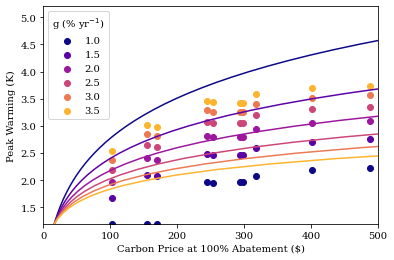

In [27]:
fig = plt.figure()

## plot output

for i in range(len(Y_array)):
    plt.scatter(P_100_list, Y_array[i], label=np.round(consumption_growth_array[i]*100, 3), color=cm.plasma(i/len(Y_array)))

# plt.legend()
plt.rc('font', family='serif')

## plot curves from Myles' paper

# W0 = 75*10**12  
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.75*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
# T_0 = 1.0136929156818866
T_0 = 1.2

T_m = np.arange(T_0, 5,0.1)
g_bar = np.arange(0.01, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
#     plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]
    plt.plot(A_B*10**(-9), T_m, color=cm.plasma(i/len(g_bar)))

plt.legend(title="g (% yr$^{-1}$)")
# plt.xlim(0, 530)
plt.xlim(0, 500)
plt.ylim(1.2, 5.2)
plt.xlabel("Carbon Price at 100% Abatement ($)")
plt.ylabel("Peak Warming (K)")

# plt.text(500, 2.3, '3.5', size="small")
# plt.text(500, 2.67, '3.0', size="small")
# plt.text(500, 2.92, '2.5', size="small")
# plt.text(500, 3.25, '2.0', size="small")
# plt.text(500, 3.75, '1.5', size="small")
# plt.text(500, 4.65, '1.0', size="small")


# fig.savefig('figures/standard_runs.png', bbox_inches='xtight', dpi = 300)

In [112]:
# np.savetxt("parameter_sensitivity_runs/Y_array_condition", Y_array, delimiter=",")

In [21]:
# np.savetxt("parameter_sensitivity_runs/SCC_0_array_condition", SCC_0_array, delimiter=",")

### Plotting MAC curves for above

In [22]:
def abatement(P, P0, P_50, P_100, r=0.04, s=0.05):  # 0.05
    if P0 >= P_50:
        print("P0 is greater than P_50")
    elif ((P_100-P0)/(P_50-P0))**(s/r) <= 2:
        print("MAC curve condition not satisfied")
    
    P_h = P0 + ((P_50 - P0) ** (-s / r) - 2 * (P_100 - P0) ** (-s / r)) ** (-r / s)
    Am = 1 + ((P_100 - P0) / (P_h - P0)) ** (-s / r)
    
    A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
    
    return A

In [23]:
consumption_growth_array[2]

0.02

/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_66884/2643110261.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_66884/2643110261.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_66884/2643110261.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_66884/2643110261.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_66884/2643110261.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_6

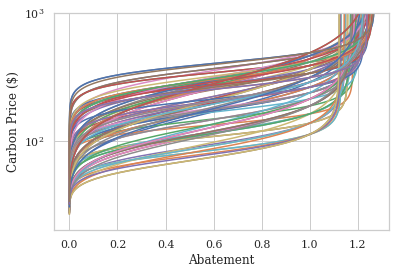

In [54]:
fig = plt.figure()

# SCC_25 = np.arange(25, 1000)
consumption_growth = consumption_growth_array[2]

for i in range(len(param_values_2)):  # 20
    SCC = np.arange(SCC_0_array[2][i], 1000)
    P0 = SCC[0]
    P_50 = param_values_2[i][0]*param_values_2[i][1]
    P_100 = param_values_2[i][1]
    consumption_discount = consumption_growth + 0.015
    r = consumption_discount
#     constraint = param_values_2[i][1]
    s = r * np.log(5)/np.log((P_100)/(P_50))
#     if constraint >2.5:
#     print(constraint)
    plt.plot(abatement(SCC, P0=P0, P_100=P_100, P_50=P_50, r=r, s=s), SCC)

plt.xlabel("Abatement")
plt.ylabel("Carbon Price ($)")
plt.yscale("log")
# plt.legend(title="P0 ($)")
plt.ylim(20, 1000)

# fig.savefig('figures/associated_MACC.png', bbox_inches='tight', dpi = 300)

### Looking at SCC_0

In [25]:
SCC_0_array[0]

array([33.68060694, 34.62732468, 34.52409639, 34.52409639, 34.62732468,
       35.36811294, 36.30343136, 36.71878851, 32.54854263, 32.54854263,
       36.71878851, 33.45135382, 33.80835727, 32.17466932, 36.49610846,
       36.49610846, 32.17466932, 35.54984063, 35.31603422, 35.95198088,
       34.00252734, 34.00252734, 35.95198088, 34.81546005, 31.30114971,
       32.36499262, 33.46060964, 33.46060964, 32.36499262, 34.30473751,
       35.93062906, 34.89730768, 36.39680525, 36.39680525, 34.89730768,
       35.49147862, 34.46377411, 34.2055171 , 30.878951  , 30.878951  ,
       34.2055171 , 30.49969978, 35.39901182, 35.11525502, 34.33986461,
       34.33986461, 35.11525502, 33.99937709, 31.21095593, 32.37911532,
       35.26161468, 35.26161468, 32.37911532, 35.96896235, 35.68974611,
       34.35212952, 34.33795264, 34.33795264, 34.35212952, 32.67173823,
       35.13429075, 34.92748178, 35.85159272, 35.85159272, 34.92748178,
       35.67908577, 35.90056127, 35.67441613, 31.10258117, 31.10

In [26]:
df = pd.DataFrame(SCC_0_array, index=np.round(consumption_growth_array*100,3)).transpose()

In [27]:
df

,1.0,1.5,2.0,2.5,3.0,3.5
0,33.680607,31.803716,30.269391,29.008824,27.951578,27.055562
1,34.627325,32.767387,31.182082,29.882078,28.781161,27.843089
2,34.524096,32.706238,31.151217,29.877430,28.790807,27.861824
3,34.524096,32.706238,31.151217,29.877430,28.790807,27.861824
4,34.627325,32.767387,31.182082,29.882078,28.781161,27.843089
...,...,...,...,...,...,...
91,35.647853,33.854332,32.285482,30.954318,29.828612,28.850448
92,35.273920,33.555595,32.032570,30.740055,29.617233,28.691137
93,35.273920,33.555595,32.032570,30.740055,29.617233,28.691137
94,35.647853,33.854332,32.285482,30.954318,29.828612,28.850448


In [28]:
# df.boxplot(whis=100)

In [29]:
# colour_scheme = ["orange","blue","yellow","green","purple","red"]

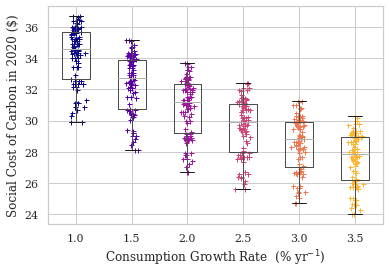

In [55]:
fig = plt.figure()

for i,d in enumerate(df):
    y = df[df.columns[i]]
    x = np.random.normal(i+1, 0.05, len(y))  # consumption_growth_array[i]
    plt.plot(x, y, ms=5, marker="+", linestyle="None", color=cm.plasma(i/len(Y_array)))  #  mfc = colour_scheme[i],
    
# plt.boxplot(df, whis=100)
df.boxplot(whis=100)  # whiskerprops = dict(linewidth=1.5), boxprops = dict(linewidth=1.5), medianprops=dict(linewidth=2, color="gray"), flierprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5)
plt.xlabel("Consumption Growth Rate  (% yr$^{-1}$)")
plt.ylabel("Social Cost of Carbon in 2020 ($)")

# fig.savefig('figures/SCC.png', bbox_inches='tight', dpi = 300)

In [31]:
df_T = pd.DataFrame(T_year_array, index=np.round(consumption_growth_array,3)).transpose()

In [32]:
df_T

,0.010,0.015,0.020,0.025,0.030,0.035
0,2195.0,2148.0,2122.0,2105.0,2093.0,2084.0
1,2188.0,2144.0,2119.0,2103.0,2091.0,2083.0
2,2210.0,2159.0,2130.0,2112.0,2099.0,2089.0
3,2210.0,2159.0,2130.0,2112.0,2099.0,2089.0
4,2188.0,2144.0,2119.0,2103.0,2091.0,2083.0
...,...,...,...,...,...,...
91,2188.0,2144.0,2120.0,2104.0,2092.0,2084.0
92,2231.0,2173.0,2142.0,2121.0,2107.0,2096.0
93,2231.0,2173.0,2142.0,2121.0,2107.0,2096.0
94,2188.0,2144.0,2120.0,2104.0,2092.0,2084.0


In [33]:
# for i,d in enumerate(df_T):
#     y = df_T[df_T.columns[i]]
#     x = np.random.normal(i+1, 0.05, len(y))  # consumption_growth_array[i]
#     plt.plot(x, y, mec='k', ms=4, marker="o", linestyle="None") # # mfc = ["orange","blue","yellow","green","purple","red"][i]
    
# # plt.boxplot(df, whis=100)
# df_T.boxplot(whis=1000, whiskerprops = dict(linewidth=2), boxprops = dict(linewidth=2), medianprops=dict(linewidth=2, color="gray"), flierprops=dict(linewidth=2), capprops=dict(linewidth=2))
# plt.xlabel("Consumption Growth Rate")
# plt.ylabel("Year of Peak Warming")

In [34]:
# plt.scatter(df_T[df_T.columns[0]], Y_array[0], color=colour_scheme[0])

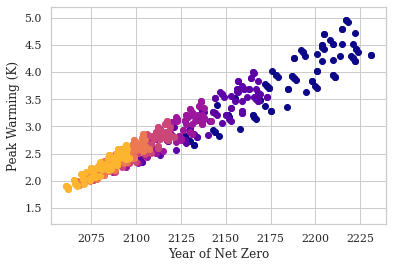

In [116]:
fig = plt.figure()

for i in range(df_T.shape[1]):
    plt.scatter(df_T[df_T.columns[i]], Y_array[i], label=np.round(consumption_growth_array[i]*100, 3), color=cm.plasma(i/len(Y_array)))

# plt.legend(title="g (% yr$^{-1}$)")
plt.xlabel("Year of Net Zero")
plt.ylabel("Peak Warming (K)")

plt.ylim(1.2, 5.2)

# fig.savefig('figures/Year_of_Peak.png', bbox_inches='tight', dpi = 300)

In [36]:
df_T.shape[1]

6